In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [6]:
# import dataset
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Data description:


*   Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
*   Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   Name - Name
*   Sex - Sex
*   Age - Age
*   Sibsp - Number of Siblings/Spouses Aboard
*   Parch - Number of Parents/Children Aboard
*   Ticket - Ticket Number
*   Fare - Passenger Fare
*   Cabin - Cabin
*   Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



# Exploratory Data Analysis

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Explore the null variable of the train dataset
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Explore the null variable of the test dataset
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The cabin column is not useful because of the number of null variables. The rest of the null variables will be filled with the median in the EDA function.

In [ ]:
data_train[["Survived","Age","SibSp","Parch","Fare"]].describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,32.204208
std,0.486592,13.019697,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


The describe function allows a statistical analysis of the numeric columns of the dataset on which it is applied.

Among the information returned, we asked ourselves for each of the numeric columns:

The number of values found
The average value of values
Type of deviation
Minimum and maximum values
the different quartiles
Reading the quartiles: 25% of passengers are under 22 years old, 25% of passengers are between 22 and 28 years old, ...

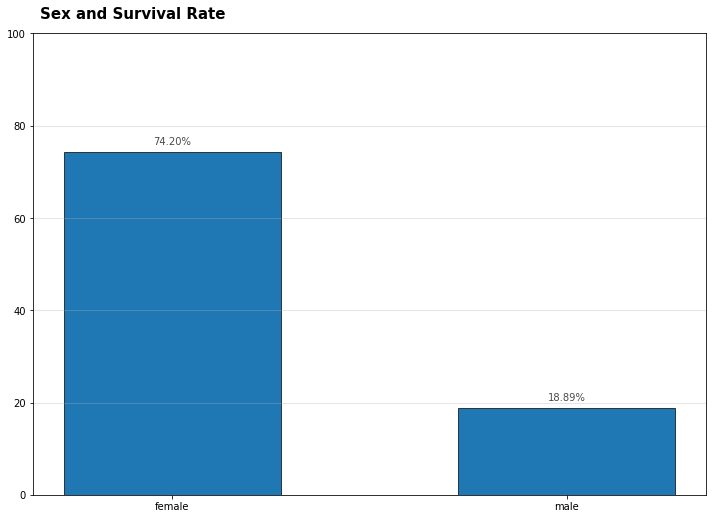

In [ ]:
def age_band(age):
    for i in range(1, 100 ,10):
        if age < i :  return str(i) + " - "+str(i+10)

data = pd.read_csv('train.csv')
titanic_sex = data[['Sex', 'Survived']].groupby('Sex')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_sex['Survival rate'] = titanic_sex[1] / (titanic_sex[0] + titanic_sex[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(titanic_sex['Survival rate'].index, titanic_sex['Survival rate'], 
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)


# Annotation Part
for i in titanic_sex['Survival rate'].index:
    ax.annotate(f"{titanic_sex['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_sex['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

# Title & Subtitle    
fig.text(0.06, 1, 'Sex and Survival Rate', fontsize=15, fontweight='bold')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()


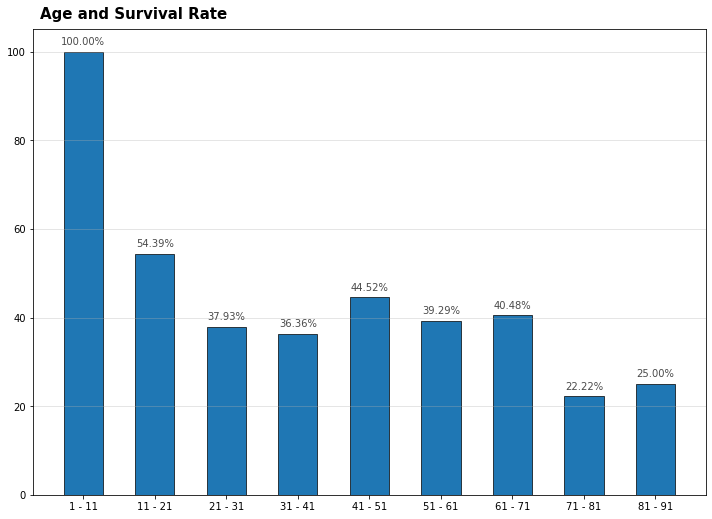

In [ ]:
def age_band(age):
    for i in range(1, 100 ,10):
        if age < i :  return str(i) + " - "+str(i+10)


data['age_band'] = data['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

# Title & Subtitle    
fig.text(0.06, 1, 'Age and Survival Rate', fontsize=15, fontweight='bold')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

kids had more chance to survive

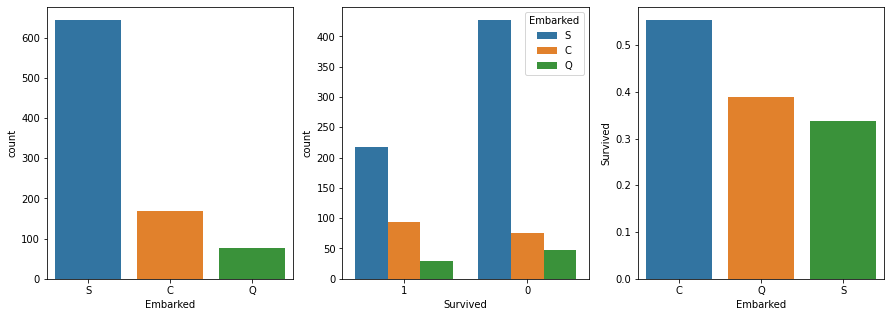

In [ ]:
%matplotlib inline
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# Graph 1
# Display the number of observations by values found in the 'Embarked' column
# The precise term is the 'distribution' of values for the 'Embarked' column
sns.countplot(x='Embarked', data=data_train, ax=axis1)

# Graph 2
# Following the same principle as the previous graph, but the distribution is done
# now for each value in the "Survived" column
sns.countplot(x='Survived', hue="Embarked", data=data_train, order=[1,0], ax=axis2)

# Graph 3
# We display the number of survivors according to the port of embarkation
embark_perc = data_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['C','Q','S'],ax=axis3)

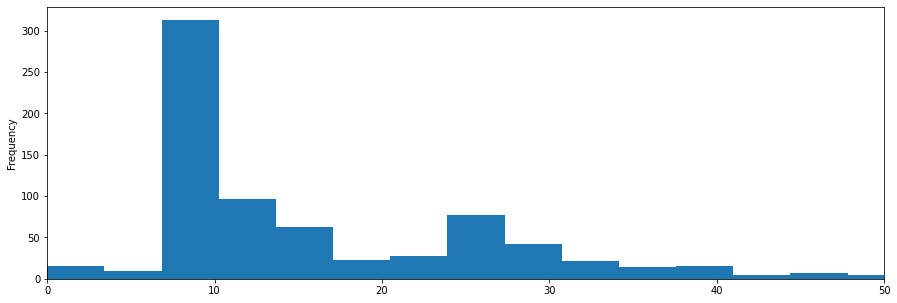

In [ ]:
# Fare distribution
result = data_train['Fare'].plot(kind='hist', figsize=(15,5),bins=150, xlim=(0,50))

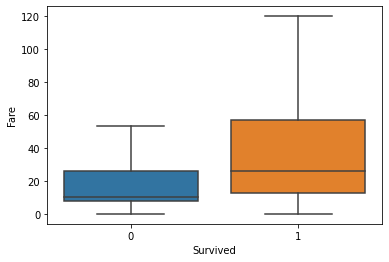

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=data_train,showfliers=False)

Age is important information, but certainly too precise to allow a good generalization.

We decide to group the individuals by age group:

In [ ]:
age_labels = ['0-4','5-9', '10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54','55-59' ,'60-64', '65-69', '70-74','75-81']
data_train['age_group'] = pd.cut(data_train.Age, range(0, 81, 5), right=False, labels=age_labels)
data_train[['Name','Age','age_group']].head(5)

,Name,Age,age_group
0,"Braund, Mr. Owen Harris",22.0,20-24
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,35-39
2,"Heikkinen, Miss. Laina",26.0,25-29
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,35-39
4,"Allen, Mr. William Henry",35.0,35-39


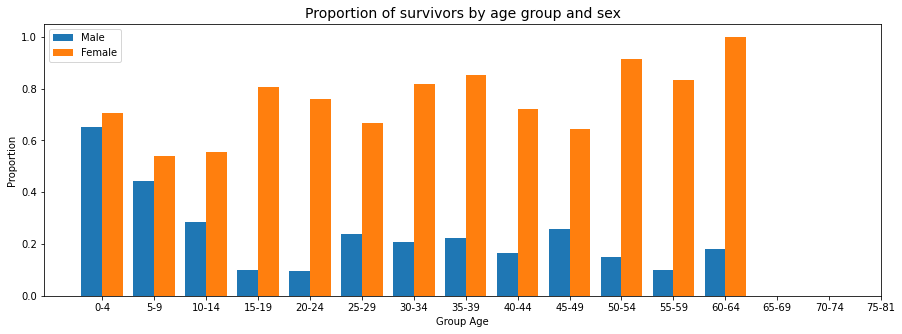

In [ ]:
male_data = data_train[data_train.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = data_train[data_train.Sex == "female"].groupby('age_group').Survived.mean().values

f, ax = plt.subplots(1, 1, figsize=(15,5))

male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4

ax.bar(male_plt_position, male_data,width=0.4,label='Male')
ax.bar(female_plt_position, female_data,width=0.4,label='Female')

tick_spacing = np.array(range(len(age_labels)))+0.2
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Group Age")
ax.set_title("Proportion of survivors by age group and sex",fontsize=14)
plt.legend(loc='best')
plt.show()

We decide to no longer differentiate the sex of children under 10 years old. We therefore create a 'Person' variable that will contain 3 possible values:

'kid'
'male'
'female'

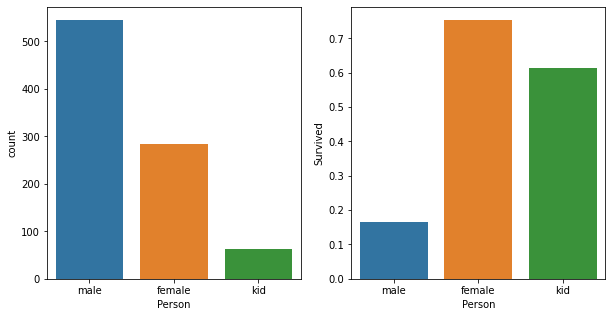

In [ ]:
def get_person(passenger):
    age,sex = passenger
    return 'kid' if age < 10 else sex
    
data_train['Person'] = data_train[['Age','Sex']].apply(get_person,axis=1)
data_train['Person'] = data_train['Person'].astype("category")

# Quelques graphiques pour illustrer le résultat
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='Person', data=data_train, ax=axis1, order=['male','female','kid'])

# Moyenne de survie pour chaque Person(male, female, or child)
person_perc = data_train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','kid'])


Text(0.5, 1.0, '% of survivors per class')

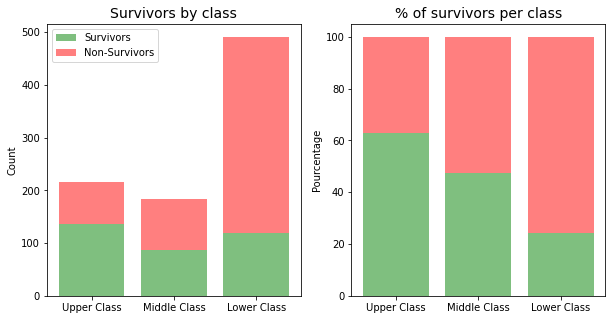

In [ ]:
survivors_data = data_train[data_train['Survived']==1]
non_survivors_data = data_train[data_train['Survived']==0]

survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

totals = survivors_class + non_survivors_class

data1_percentages = survivors_class / totals*100 
data2_percentages = non_survivors_class / totals*100 

class_categories = ['Upper Class', 'Middle Class', 'Lower Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0, 1, 2],  class_categories)

ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Survivors by class",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0, 1, 2],  class_categories)
ax2.set_ylabel("Pourcentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors per class",fontsize=14)

In [7]:
from sklearn import preprocessing

def EDA(data) :

    # drop the useless variables
    data = data.drop(columns = ["Cabin","Name","PassengerId"])

    # encoding the str variables
    le = preprocessing.LabelEncoder()
    le.fit(data['Ticket'])
    data['Ticket'] = le.transform(data['Ticket'])
    
    data['Embarked']=data['Embarked'].astype('str')
    le.fit(data['Embarked'])
    data['Embarked'] = le.transform(data['Embarked'])

    # encoding object variables
    test  = pd.get_dummies(data.Sex, sparse=True)
    data = pd.concat([data, test], axis = 1).drop(columns = ['Sex'])

    # filling the missing values with median 
    data.fillna(data.median(),inplace=True)

    return data

train_set = EDA(data_train)
test_set = EDA(data_test)
train_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,0,3,22.0,1,0,523,7.2500,2,0,1
1,1,1,38.0,1,0,596,71.2833,0,1,0
2,1,3,26.0,0,0,669,7.9250,2,1,0
3,1,1,35.0,1,0,49,53.1000,2,1,0
4,0,3,35.0,0,0,472,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,101,13.0000,2,0,1
887,1,1,19.0,0,0,14,30.0000,2,1,0
888,0,3,28.0,1,2,675,23.4500,2,1,0
889,1,1,26.0,0,0,8,30.0000,0,0,1


In [8]:
test_set

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,3,34.5,0,0,152,7.8292,1,0,1
1,3,47.0,1,0,221,7.0000,2,1,0
2,2,62.0,0,0,73,9.6875,1,0,1
3,3,27.0,0,0,147,8.6625,2,0,1
4,3,22.0,1,1,138,12.2875,2,1,0
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,267,8.0500,2,0,1
414,1,39.0,0,0,324,108.9000,0,1,0
415,3,38.5,0,0,346,7.2500,2,0,1
416,3,27.0,0,0,220,8.0500,2,0,1


Text(0.5, 1.0, 'Correlation_matrix')

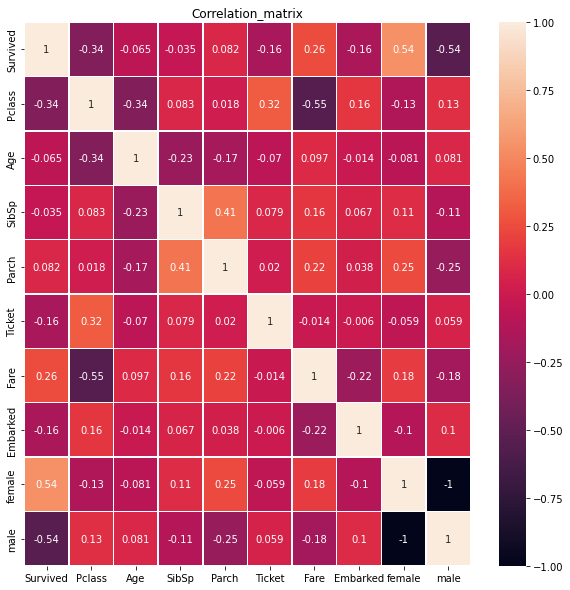

In [ ]:
# compute the correlation matrix
cormat = data_train.corr()
round(cormat,2)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(cormat, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation_matrix")

In [9]:
# the information in male and female columns are redondant : drop one of the column 
train_set = train_set.drop(columns = ["male"])
test_set = test_set.drop(columns = ["male"])

In [10]:
X = train_set.iloc[:, 1:].values
Y = train_set.iloc[:, 0].values

Splitting the dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Models

In [13]:
scores_modeles = pd.DataFrame(columns=['model_name', 'score'])

## Logistic Regression

In [14]:
# train the model (logistic regression)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
parameter = [{'penalty':['l2','l1','elasticnet', 'none'],'C':[0.25,0.5,0.75,1],'intercept_scaling':[1,0.5,2]}]
grid_search_log=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_log.fit(X_train,y_train)
best_accuracy_log=grid_search_log.best_score_
best_params_log=grid_search_log.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_log*100))
print("Best Parameters:", best_params_log)

Best Accuracy: 79.65 %
Best Parameters: {'C': 0.25, 'intercept_scaling': 1, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [15]:
scoreDF = pd.DataFrame({'model_name': ['Logistic Regression'],'score': [best_accuracy_log]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546


In [16]:
# predict the results of the model
y_pred_log_reg = grid_search_log.predict(X_test)

In [17]:
#Show confusion matrix
conf_matr_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(conf_matr_log_reg)

[[97 17]
 [20 45]]


## Support Vector Machine

In [18]:
from sklearn.svm import SVC
parameter = [{'kernel':['rbf','linear'],'C':[0.1,0.2,0.3,0.5,0.7,0.9]}]
grid_search_svm=GridSearchCV(estimator=SVC(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_svm.fit(X_train,y_train)
best_accuracy_svm=grid_search_svm.best_score_
best_params_svm=grid_search_svm.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_svm*100))
print("Best Parameters:", best_params_svm)

Best Accuracy: 83.17 %
Best Parameters: {'C': 0.3, 'kernel': 'rbf'}


In [19]:
scoreDF = pd.DataFrame({'model_name': ['SVC'],'score': [best_accuracy_svm]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546
1,SVC,0.831660


In [20]:
# predict the results of the model
y_pred_svm = grid_search_svm.predict(X_test)

In [21]:
#Show confusion matrix
conf_matr_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matr_svm)

[[100  14]
 [ 22  43]]


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
parameter = [{'splitter':["best", "random"],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_dt.fit(X_train,y_train)
best_accuracy_dt=grid_search_dt.best_score_
best_params_dt=grid_search_dt.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_dt*100))
print("Best Parameters:", best_params_dt)

Best Accuracy: 78.51 %
Best Parameters: {'criterion': 'gini', 'splitter': 'best'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

In [23]:
scoreDF = pd.DataFrame({'model_name': ['Decision Tree'],'score': [best_accuracy_dt]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546
1,SVC,0.831660
2,Decision Tree,0.785078


In [24]:
# predict the results of the model
y_pred_dt = grid_search_dt.predict(X_test)

In [25]:
#Show confusion matrix
conf_matr_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_dt)

[[94 20]
 [14 51]]


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
parameter = [{'n_estimators':[100,50,150,200],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_rf.fit(X_train,y_train)
best_accuracy_rf=grid_search_rf.best_score_
best_params_rf=grid_search_rf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_rf*100))
print("Best Parameters:", best_params_rf)

Best Accuracy: 83.01 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 100}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

In [27]:
scoreDF = pd.DataFrame({'model_name': ['Random Forest'],'score': [best_accuracy_rf]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546
1,SVC,0.831660
2,Decision Tree,0.785078
3,Random Forest,0.830057


In [28]:
# predict the results of the model
y_pred_rf = grid_search_rf.predict(X_test)

In [29]:
#Show confusion matrix
conf_matr_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matr_rf)

[[101  13]
 [ 17  48]]


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
parameters = [{"n_neighbors" : [3,5,10,15,20]
               }]
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_knn.fit(X_train, y_train)
best_accuracy_knn = grid_search_knn.best_score_
best_parameters_knn = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_knn*100))
print("Best Parameters:", best_parameters_knn)

Best Accuracy: 81.18 %
Best Parameters: {'n_neighbors': 10}


In [31]:
scoreDF = pd.DataFrame({'model_name': ['KNN'],'score': [best_accuracy_knn]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546
1,SVC,0.831660
2,Decision Tree,0.785078
3,Random Forest,0.830057
4,KNN,0.811757


In [32]:
# predict the results of the model
y_pred_knn = grid_search_knn.predict(X_test)

In [33]:
# Show confustion matrix

conf_matr_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matr_knn)

[[106   8]
 [ 23  42]]


## XGBoost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8324022346368715

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = [{"n_estimators" : [100,150,200],
               "learning_rate" : [0.1,0.09,0.01],
                "max_depth" : [1,10]
               }]
grid_search_xgboost = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_xgboost.fit(X_train, y_train)
best_accuracy_xg = grid_search_xgboost.best_score_
best_parameters = grid_search_xgboost.best_params_

In [36]:
print("best_accuracy : {:.2f} %".format(best_accuracy_xg*100))
print("Best Parameters:", best_parameters)

best_accuracy : 82.03 %
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}


In [37]:
# predict the results of the model
y_pred_xgb = grid_search_xgboost.predict(X_test)

In [38]:
# Show confustion matrix

conf_matr_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matr_knn)

[[106   8]
 [ 23  42]]


In [39]:
scoreDF = pd.DataFrame({'model_name': ['XGboost'],'score': [best_accuracy_xg]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.796546
1,SVC,0.831660
2,Decision Tree,0.785078
3,Random Forest,0.830057
4,KNN,0.811757
5,XGboost,0.820305


In [40]:
best = scores_modeles[scores_modeles.score == max(scores_modeles.score)]['model_name'].values[0]
print(f'the best model is {best} with an accuracy of {round(max(scores_modeles.score),3)}')

the best model is SVC with an accuracy of 0.832


# Predictions on the test set

In [41]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
test_set = sc_X.fit_transform(test_set)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [47]:
# predictions with the best model
survivors = grid_search_svm.predict(test_set)

In [48]:
# collect the results and create the final csv file
results = pd.read_csv('test.csv')
results['Survived'] = survivors

In [50]:
results.to_csv("predictions")